Provide total number of nodes in network 200
Provide route to look up in real node 


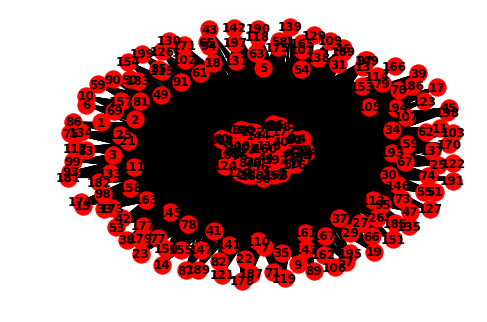

Provide start node 3
Provide destination node 100
Sourch to Destination path: 
3 =>100

Provide number of superpeers 5


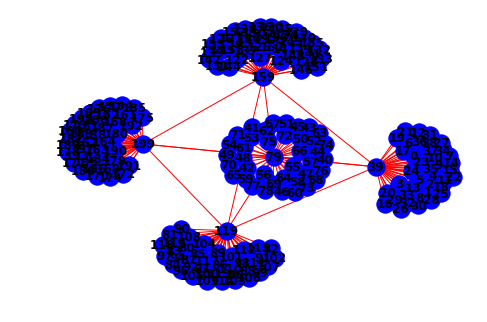

Sourch to Destination route through overlay network: 
3 =>39
39 =>119
119 =>100



In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import sys


##initialize graph class ##
class Vertex:
    def __init__(self, a):
        
        self.name= a
        self.adjacency_list = list()
        self.dist = 1000
        self.status = 'not_visited'
    def add_adjacency_list(self,a):
        if a not in self.adjacency_list:
            self.adjacency_list.append(a)
            self.adjacency_list.sort()

class Graph:
    list_of_vertex = {}
    
    def add_vertex(self, v):
        if isinstance(v, Vertex) and v.name not in self.list_of_vertex:
            self.list_of_vertex[v.name] = v
            return True
        else:
            return False
    
    def add_edge(self, u, v):
        if u in self.list_of_vertex and v in self.list_of_vertex:
            for key, value in self.list_of_vertex.items():
                if key == u:
                    value.add_adjacency_list(v)
                if key == v:
                    value.add_adjacency_list(u)
            return True
        else:
            return False

            
    def breadth_first_search(self, src, dst, path):
        

        queue = list()
        src.dist = 0
        src.status = 'visited'
        for v in src.adjacency_list:
            
            self.list_of_vertex[v].dist = src.dist + 1
            queue.append(v)
            path[v]=src.name
        
        while len(queue) > 0:
            u = queue.pop(0)
            node_u = self.list_of_vertex[u]
            node_u.status = 'visited'
            if(dst == u):
                
                break
            
            
            for v in node_u.adjacency_list:
                
                node_v = self.list_of_vertex[v]
                
                if node_v.status == 'not_visited':
                    queue.append(v)
                    
                    if node_v.dist > (node_u.dist + 1):
                        
                        
                        node_v.dist = node_u.dist +1
                        path[v]=u

##Graph class finished

G = nx.Graph()
n=int(input("Provide total number of nodes in network "))
print("Provide route to look up in real node ")

## real node visualizaiton part##


for i in range(n):
    G.add_node(i)


    

for i in range(n):
    for j in range(0, n, int(4)):
        if(i==j and i!=1 and i!=n-1):
            G.add_edge(i,j+1)
            
        elif(i==j and i==0):
            G.add_edge(i,j+1)
            
        elif(i==j and i==n-1):
            G.add_edge(i,j-1)
            
        else:
            G.add_edge(i,j)
            
                
nx.draw(G, with_labels=True, font_weight='bold')

plt.show()

## real node visualization part finished

## Route query in real graph ##

g = Graph()

start_node= int(input("Provide start node "))
a= Vertex(str(start_node))
g.add_vertex(a)
end_node = int(input("Provide destination node "))
b= Vertex(str(end_node))
g.add_vertex(b)


for i in range(n):
    
    g.add_vertex(Vertex(str(i)))
    #print("str(i) ",str(i))

    

for i in range(n):
    for j in range(0, n, int(4)):
        if(i==j and i!=1 and i!=n-1):
            
            g.add_edge(str(i),str(j+1))
        elif(i==j and i==0):
            
            g.add_edge(str(i),str(j+1))
        elif(i==j and i==n-1):
            
            g.add_edge(str(i),str(j-1))
        else:
           
            g.add_edge(str(i),str(j))

path = {}
g.breadth_first_search(a,b, path)

out =""
v= str(end_node)

while(v!=str(start_node)):
    
    u=path[v]
    out= u +" =>"+ v +"\n"+ out
    v=u
print("Sourch to Destination path: \n"+out)               
      

## Route query in real graph finished ##
## Visualization of overlay network ##

class Vertex2:
   
        
    def __init__(self, a):
        
        self.name= a
        self.adjacency_list = list()
        self.dist = 1000
        self.status = 'not_visited'
    def add_adjacency_list(self,a):
        if a not in self.adjacency_list:
            self.adjacency_list.append(a)
            self.adjacency_list.sort()

class Graph2:
    list_of_vertex = {}
    
    def add_vertex(self, v):
        if isinstance(v, Vertex2) and v.name not in self.list_of_vertex:
            self.list_of_vertex[v.name] = v
            return True
        else:
            return False
    
    def add_edge(self, u, v):
        if u in self.list_of_vertex and v in self.list_of_vertex:
            for key, value in self.list_of_vertex.items():
                if key == u:
                    value.add_adjacency_list(v)
                if key == v:
                    value.add_adjacency_list(u)
            return True
        else:
            return False

            
    def bfs2(self, src, dst, path):
        

        queue = list()
        src.dist = 0
        src.status = 'visited'
        for v in src.adjacency_list:
            
            self.list_of_vertex[v].dist = src.dist + 1
            queue.append(v)
            path[v]=src.name
        
        while len(queue) > 0:
            u = queue.pop(0)
            node_u = self.list_of_vertex[u]
            node_u.status = 'visited'
            if(dst == u):
                
                break
            
            
            for v in node_u.adjacency_list:
                
                node_v = self.list_of_vertex[v]
                
                if node_v.status == 'not_visited':
                    queue.append(v)
                    
                    if node_v.dist > (node_u.dist + 1):
                        
                        
                        node_v.dist = node_u.dist +1
                        path[v]=u
  
    
p=int(input("Provide number of superpeers "))
region_amount= n/p
region_amount= int(region_amount)


normal=[]
superpeer=[]
Overlay=nx.Graph() 


g2 = Graph2()
a2= Vertex2(str(start_node))
g2.add_vertex(a2)
b2= Vertex2(str(end_node))
g2.add_vertex(b2) 

    

for i in range(region_amount-1, n, region_amount):
    Overlay.add_node(i, node_color='b')
    superpeer.append(i)

for i in range(n):
    if i not in superpeer:
            Overlay.add_node(i, node_color='g')
            normal.append(i)

        

for i in range(len(superpeer)):
    if(i==0):
        for j in range(0,superpeer[i]):
            Overlay.add_edge(superpeer[i],j)


    elif(i==(len(superpeer)-1)):
        for j in range(superpeer[i-1]+1,n):
            Overlay.add_edge(superpeer[i],j)

        
    else:
        for j in range(superpeer[i-1]+1,superpeer[i] ):
            
        
            Overlay.add_edge(superpeer[i],j)

        
for i in range(len(superpeer)):
    for j in range(len(superpeer)):
        if(i!=j):
            Overlay.add_edge(superpeer[i],superpeer[j])

nx.draw(Overlay, with_labels=True,edge_color='r', font_weight='bold', node_color='b')

plt.show()

## Visualization of overlay network finished##
## Route query in overlay graph  ##
               
normal2=[]
superpeer2=[]            
              
              
        

    

for i in range(region_amount-1, n, region_amount):
    
    superpeer2.append(i)
    #print("super peer ",i)
    g2.add_vertex(Vertex2(str(i)))
for i in range(n):
    if i not in superpeer2:
            
            normal2.append(i)
           # print("normal ",i)
            g2.add_vertex(Vertex2(str(i)))
        

for i in range(len(superpeer2)):
    if(i==0):
        for j in range(0,superpeer2[i]):
            
           # print("when i=0", superpeer[i],j)
            g2.add_edge(str(superpeer2[i]),str(j))

    elif(i==(len(superpeer2)-1)):
        for j in range(superpeer2[i-1]+1,n):
            
            #print("when i=len(superpeer)-1 ",superpeer[i],j)
            g2.add_edge(str(superpeer2[i]),str(j))
        
    else:
        for j in range(superpeer2[i-1]+1,superpeer2[i] ):
            
        
            
            #print("when i!=0",superpeer[i],j)
            g2.add_edge(str(superpeer2[i]),str(j))
        
for i in range(len(superpeer2)):
    for j in range(len(superpeer2)):
        if(i!=j):
            
            g2.add_edge(str(superpeer2[i]),str(superpeer2[j]))    
        
        
    


                              

path_track = {}
g2.bfs2(a2,b2, path_track)

output = ""
destination= str(end_node)


while(destination!=str(start_node)):
    
    u2= path_track[destination]
    output= u2 +" =>"+ destination +"\n"+ output
    destination=u2
print("Sourch to Destination route through overlay network: \n"+output)               
      
## Route query in overlay graph finished ##


